## KPIs

Based on the EDA performed, different KPIs are here defined in order to bring insights regarding areas of potential growth.
This potential may relate to areas that are attractive for expanding the national relevance of a company providing internet access services (ISPs) or areas where efforts need to be focused because they have been neglected in the national landscape.

+ Customer Acquisition Rate: Measure the rate at which new customers are acquired in the targeted areas. This KPI helps to track the effectiveness of efforts in attracting and converting new customers.
  
  This KPI would indicate how much evolved the customer attraction by other companies in the last couple of years.
  A low acquisition rate would indicate that the companies have had a poor performance capturing new costumers in the area.

+ Service Quality Metrics: Track metrics related to service quality, such as network uptime, average internet speed, latency, and customer support response time. Improving these metrics can enhance customer experience and attract new customers.

  Based on other [studies](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113) performed regarding Churn Rates, product dissatisfaction and competitors withe better/ faster devices" is the main reason for customers to change their ISP.
  Comparing the internet speed in an area with the national average, is an indicator of bad quality services.

+ Optical fiber / ADSL works as an indicator of how outdated is the techonology of the provided services in a zone.
  
  Based on additional reports from [CABASE](https://www.cabase.org.ar/wp-content/uploads/2019/12/CABASE-Internet-Index-II-Semestre-2019.pdf), Fibre optics is shaping up to be the next industry standard technology. And, therefore, it has become the preferred choice of ISPs for new installations.
  Similar to the previous one, this KPI aims to highlight areas where the deployed technology is turning outdated.

+ Market Share: Monitor the market share in the targeted areas.
  
  When identifying potential growth areas, it is important to identify the density of competitors or the number of suppliers competing in the same market segment.
  Therefore, this KPI seeks to point out areas where the number of potential customers is high in relation to the number of competitors.

+ Return on Investment (ROI): Measured as the potential number of new customers vs the area of new infrastructure of optical fiber or cable modem to deploy.
  
  Given Argentina's spiralling inflationary problems, comparing revenues in local currency generates a bias towards believing that the sector's turnover is steadily increasing.
  Therefore, this report chooses to consider the number of customers captured as a return, as they will be the ones paying for a service.
  Similarly, the investment to acquire such customers will be dominated by the infrastructural works that need to be carried out in order to provide service coverage. Therefore, the investment will be associated with the km2 to be covered to supply the customers.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
# Define Map
folder_path = ''
shapefile = './GeoJSON/ne_10m_admin_1_states_provinces.shp'
gdf = gpd.read_file(folder_path + shapefile)
provinces = gdf[gdf['iso_a2'] == 'AR'][['name', 'geometry']]


### Customer Acquisition Rate

#### Calculating the average change in Internet Accesses

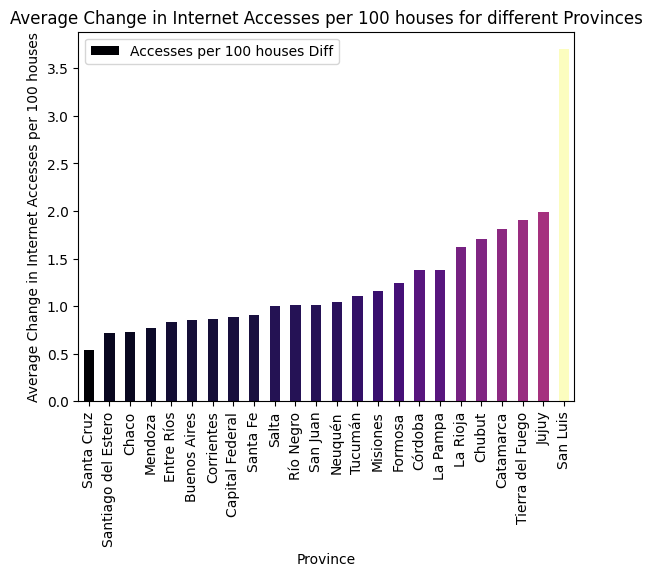

In [ ]:
filepath = './datasets/'
df = pd.read_csv(filepath + 'Internet_Penetracion.csv')

# Replace commas with periods in the 'access' column
df.rename(columns={'Accesos por cada 100 hogares': 'Accesses per 100 houses'}, inplace=True)
df['Accesses per 100 houses'] = df['Accesses per 100 houses'].str.replace(',', '.')
# Convert the 'access' column to a float
df['Accesses per 100 houses'] = df['Accesses per 100 houses'].astype(float)


# Filter the DataFrame to include only the rows from the last 5 years
df = df[df['Año']>=2018]


# Group the DataFrame by province and sort by year and trimester
df_grouped = df.groupby('Provincia').apply(lambda x: x.sort_values(['Año', 'Trimestre'], ))

# Calculate the differences in internet access between time periods
df_grouped = df_grouped.drop('Provincia', axis =1)
df_grouped['Accesses per 100 houses Diff'] = df_grouped.groupby('Provincia')['Accesses per 100 houses'].diff()

# Calculate the mean of the differences by province
df_grouped = df_grouped.dropna()
df_mean_diff = df_grouped.groupby('Provincia')['Accesses per 100 houses Diff'].mean()

# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('magma')

# Create a bar plot of the average Mbps internet speed in each province

vmin=df_mean_diff.min()
vmax=df_mean_diff.max()
df_mean_diff = df_mean_diff.sort_values()
ax = df_mean_diff.plot(kind='bar',
                        color=cmap((df_mean_diff - vmin) / (vmax - vmin)))



# Set the title, x-axis label, and y-axis label
plt.title('Average Change in Internet Accesses per 100 houses for different Provinces')
plt.xlabel('Province')
plt.ylabel('Average Change in Internet Accesses per 100 houses')

# Add a legend to the plot
plt.legend()
# Show the plot
plt.show()

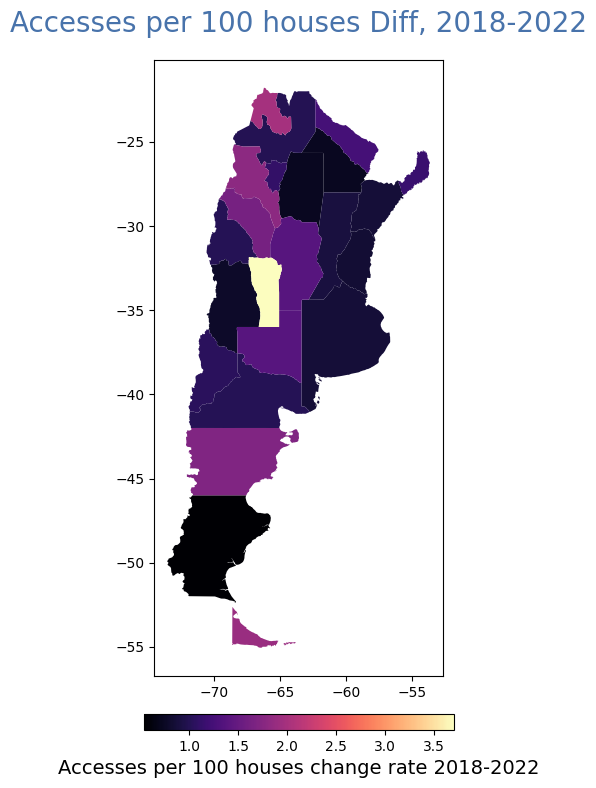

In [ ]:
# Create Map df with data to plot
df_map = pd.merge(df_mean_diff, provinces,
                  left_on='Provincia',
                  right_on = 'name')
df_map.rename(columns={'name': 'Province'}, inplace=True)
# Convert the DataFrame to a GeoDataFrame, using the 'geometry' column as the spatial information
df_map = gpd.GeoDataFrame(df_map, geometry='geometry')

# Extract the minimum and maximum values of the 'Accesses per 100 houses Diff' column
vmin = df_map['Accesses per 100 houses Diff'].min()
vmax = df_map['Accesses per 100 houses Diff'].max()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define axis
ax.set_title('Accesses per 100 houses Diff, 2018-2022',
             pad=20, fontdict={'fontsize':20, 'color':'#4873ab'})
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')

# Plot the GeoDataFrame with the scaled colormap
df_map.plot(column='Accesses per 100 houses Diff', cmap='magma', ax=ax, zorder=5, vmin=vmin, vmax=vmax)


# Add a color bar next to the plot
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.05, orientation='horizontal')
cbar.set_label('Accesses per 100 houses change rate 2018-2022', fontdict={'fontsize':14})


# Show the plot
plt.show()

From this analysis, it can be seen that with the exception of the case of *San Luis*, ISPs have a fairly equal success in attracting new customers throughout the country.

### Service Quality Metrics

C:\Users\carna\AppData\Local\Temp\ipykernel_22252\3855487818.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_prov[column] = df_prov[column].str.replace('*', '')


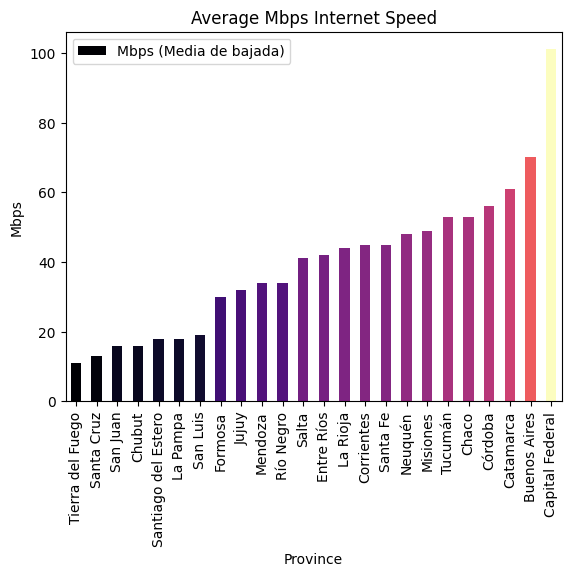

In [ ]:
df_prov = pd.read_csv(filepath + 'historico_velocidad_internet.csv')
columns = ['Mbps (Media de bajada)']
for column in columns:
    df_prov[column] = df_prov[column].astype(str)
    df_prov[column] = df_prov[column].str.replace(',', '.')
    df_prov[column] = df_prov[column].str.replace('-', '')
    df_prov[column] = df_prov[column].str.replace('*', '')
    df_prov[column] = df_prov[column].astype(float)

df_prov = df_prov.drop(['Unnamed: 4',	'Unnamed: 5'], axis = 1)


df_prov2022 = df_prov[df_prov['Año'] == 2022]
df_prov2022 = df_prov2022[df_prov2022['Trimestre'] == 3]
df_prov2022 = df_prov2022[['Provincia','Mbps (Media de bajada)']]


# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('magma')

# Create a bar plot of the average Mbps internet speed in each province

vmin=df_prov2022['Mbps (Media de bajada)'].min()
vmax=df_prov2022['Mbps (Media de bajada)'].max()
df_prov2022 = df_prov2022.sort_values('Mbps (Media de bajada)')
ax = df_prov2022.plot(kind='bar',
                        x='Provincia',
                        y='Mbps (Media de bajada)',
                        color=cmap((df_prov2022['Mbps (Media de bajada)'] - vmin) / (vmax - vmin)))

# Set the title, x-axis label, and y-axis label
ax.set_title('Average Mbps Internet Speed')
ax.set_xlabel('Province')
ax.set_ylabel('Mbps')

# Show the plot
plt.show()

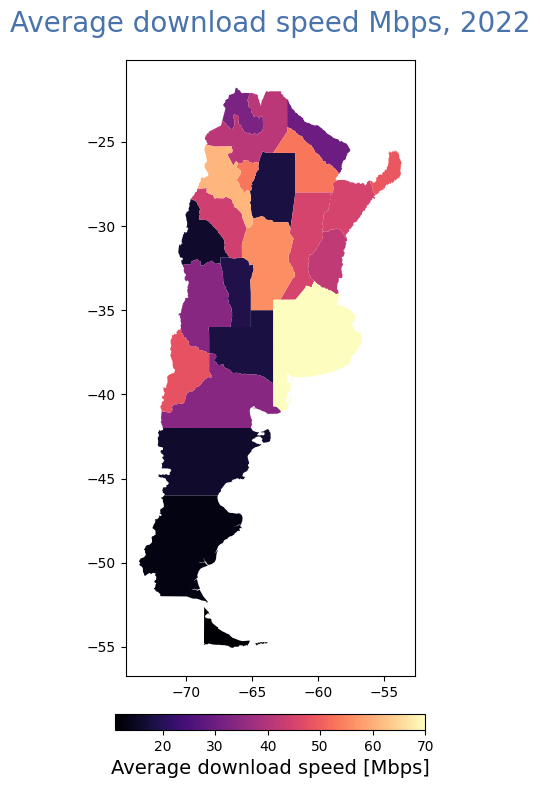

In [ ]:
# Create Map df with data to plot
df_map = pd.merge(df_prov2022, provinces,
                  left_on='Provincia',
                  right_on = 'name')
df_map.rename(columns={'name': 'Province'}, inplace=True)
# Convert the DataFrame to a GeoDataFrame, using the 'geometry' column as the spatial information
df_map = gpd.GeoDataFrame(df_map, geometry='geometry')

# Extract the minimum and maximum values of the 'Accesses per 100 houses Diff' column
vmin = df_map['Mbps (Media de bajada)'].min()
vmax = df_map['Mbps (Media de bajada)'].max()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define axis
ax.set_title('Average download speed Mbps, 2022',
             pad=20, fontdict={'fontsize':20, 'color':'#4873ab'})
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')

# Plot the GeoDataFrame with the scaled colormap
df_map.plot(column='Mbps (Media de bajada)', cmap='magma', ax=ax, zorder=5, vmin=vmin, vmax=vmax)


# Add a color bar next to the plot
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.05, orientation='horizontal')
cbar.set_label('Average download speed [Mbps]', fontdict={'fontsize':14})


# Show the plot
plt.show()

This analysis allows us to identify some provinces that are notoriously lagging behind in service quality.

In particular, the cases of:
+ Tierra del Fuego
+ Santa Cruz
+ San Juan
+ Chubut
+ Santiago del Estero
+ La Pampa
+ San Luis

Followed by:
+ Formosa
+ Jujuy
+ Mendoza
+ Rio NEgro

However, we previously identified that the ISP conversion strategies were strong in San Luis.

### Optical fiber / ADSL ratio

#### National Perspective

C:\Users\carna\AppData\Local\Temp\ipykernel_22252\1006126748.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tot[column] = df_tot[column].str.replace('.', '')


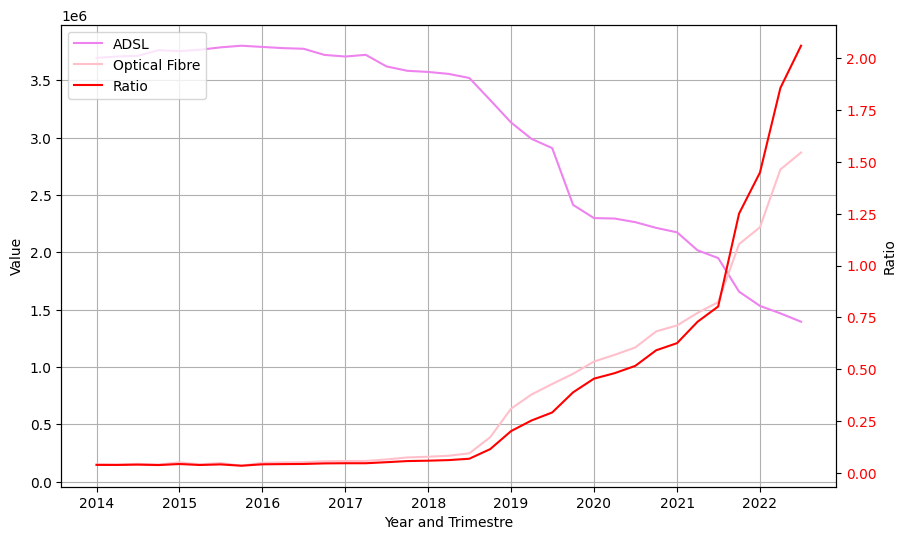

In [ ]:
df_tot = pd.read_csv(filepath + 'Internet_Accesos_techs_total.csv')
columns = ['ADSL',	'Cablemodem',	'Fibra óptica',	'Wireless',	'Otros',	'Total']
for column in columns:
    df_tot[column] = df_tot[column].astype(str)
    df_tot[column] = df_tot[column].str.replace('.', '')
    df_tot[column] = df_tot[column].str.replace('-', '')
    df_tot[column] = df_tot[column].astype(int)

df_tot.rename(columns={'Fibra óptica': 'Optical Fibre'}, inplace=True)

# Convert the trimester and year columns into a single datetime column
df_tot['date'] = pd.to_datetime(df_tot['Año'].astype(str) + 'Q' + df_tot['Trimestre'].astype(str))

# Calculate Ratio column
df_tot['Ratio'] = df_tot['Optical Fibre'] / df_tot['ADSL']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the values of each column against time
ax.plot(df_tot['date'], df_tot['ADSL'], color='violet', label='ADSL')
ax.plot(df_tot['date'], df_tot['Optical Fibre'], color='pink', label='Optical Fibre')

# Set the axis labels and title
ax.set_xlabel('Year and Trimestre')
ax.set_ylabel('Value')
#ax.legend()
ax.grid()


# Create a second y-axis on the right side of the plot
ax2 = ax.twinx()

# Define the y-axis data for the second column
y2 = df_tot['Ratio']

# Create a line plot for the second column
ax2.plot(df_tot['date'], y2, label='Ratio', color='red')

# Set the axis label and tick parameters for the second y-axis
ax2.set_ylabel('Ratio')
ax2.tick_params(axis='y', labelcolor='red')


#Legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

From the plot, it can be appreciated that since mid 2021, Optical Fiber has overtaken ADSL at the national level.
It took to this technology approximately 3 years to replace ADSL as the second most important Internet service technology.

#### Provinces Perspective

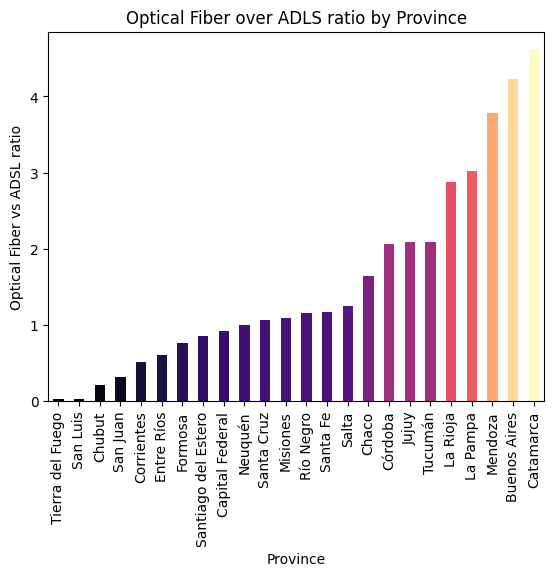

In [4]:
filepath = './datasets/'

df_prov = pd.read_csv(folder_path + filepath + 'Internet_Accesos_techs.csv')

df_prov = df_prov.dropna()
columns = ['Año','Trimestre','ADSL',	'Cablemodem',	'Fibra óptica',	'Wireless',	'Otros',	'Total']
for column in columns:
    df_prov[column] = df_prov[column].astype(str)
    df_prov[column] = df_prov[column].str.replace('.', '')
    df_prov[column] = df_prov[column].str.replace('-', '')
    df_prov[column] = df_prov[column].str.replace('*', '')
    df_prov[column] = df_prov[column].astype(int)

# Filter the DataFrame to include only the rows where year is 2022
df_2022 = df_prov[df_prov['Año']==2022]
df_2022 = df_2022[df_2022['Trimestre']==3]


# Drop not used columns
df_2022 = df_2022.drop(['Año','Trimestre'], axis = 1)

# Create a stacked bar plot of the fraction of internet services brought by each technology for each province
df_2022 = df_2022.set_index('Provincia')
df_2022['OpticalFiber_over_ADSL'] = df_2022['Fibra óptica']/df_2022['ADSL']
df_2022 = df_2022['OpticalFiber_over_ADSL']
df_2022 = df_2022.sort_values()

# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('magma')

# Create a bar plot of the average Mbps internet speed in each province

vmin=df_2022.min()
vmax=df_2022.max()
ax = df_2022.plot(kind='bar',
                        x='Provincia',
                        y='Optical Fiber over ADSL ratio',
                        color=cmap((df_2022 - vmin) / (vmax - vmin)))




# Set the title, x-axis label, and y-axis label
ax.set_title('Optical Fiber over ADLS ratio by Province')
ax.set_xlabel('Province')
ax.set_ylabel('Optical Fiber vs ADSL ratio')

# Show the plot
plt.show()

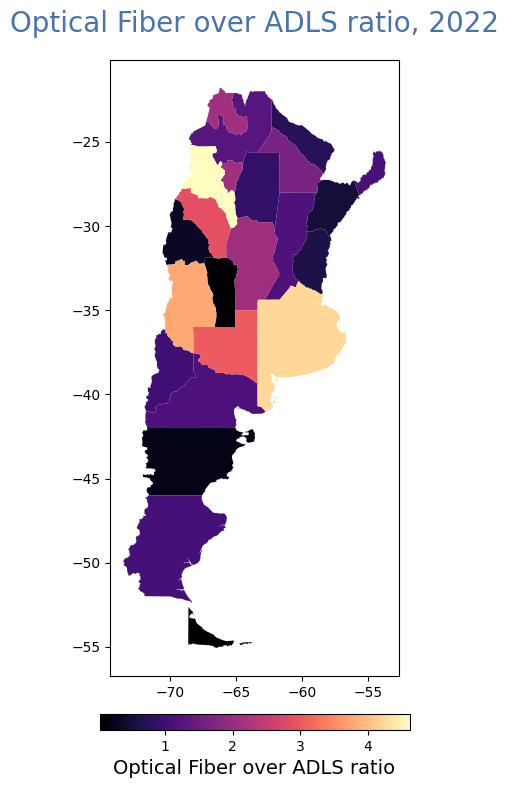

In [5]:
# Create Map df with data to plot
df_map = pd.merge(df_2022, provinces,
                  left_on='Provincia',
                  right_on = 'name')
df_map.rename(columns={'name': 'Province'}, inplace=True)
# Convert the DataFrame to a GeoDataFrame, using the 'geometry' column as the spatial information
df_map = gpd.GeoDataFrame(df_map, geometry='geometry')

# Extract the minimum and maximum values of the 'Accesses per 100 houses Diff' column
vmin = df_map['OpticalFiber_over_ADSL'].min()
vmax = df_map['OpticalFiber_over_ADSL'].max()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define axis
ax.set_title('Optical Fiber over ADLS ratio, 2022',
             pad=20, fontdict={'fontsize':20, 'color':'#4873ab'})
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')

# Plot the GeoDataFrame with the scaled colormap
df_map.plot(column='OpticalFiber_over_ADSL', cmap='magma', ax=ax, zorder=5, vmin=vmin, vmax=vmax)


# Add a color bar next to the plot
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.05, orientation='horizontal')
cbar.set_label('Optical Fiber over ADLS ratio', fontdict={'fontsize':14})


# Show the plot
plt.show()

This analysis enables to identify provinces with outdated technologies.

The cases of:
+ Tierra del Fuego
+ San Luis
+ Chubut
+ San Juan
+ Corrientes
+ Entre Rios
+ Formosa
+ Santiago del Estero

are of particular interest.

### Market Share

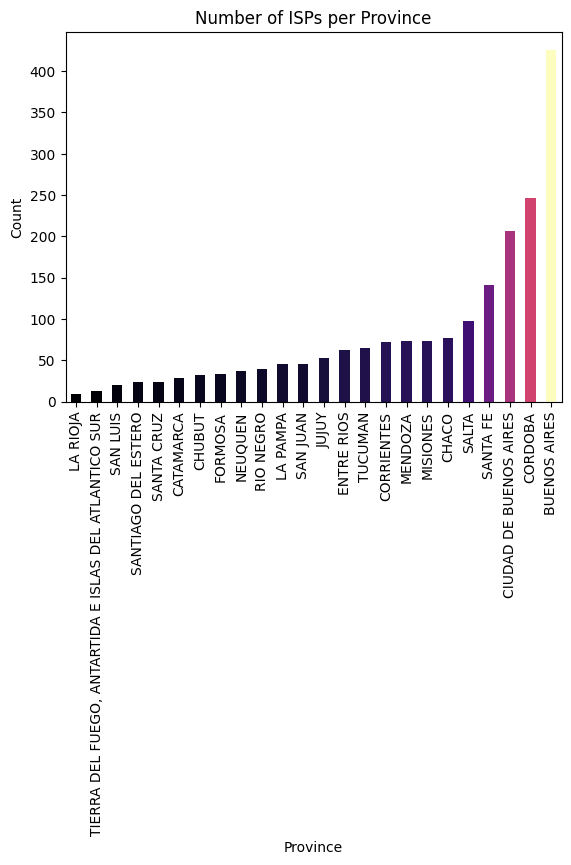

In [27]:
df_ISP = pd.read_csv(folder_path + filepath + 'Licencias_TIC.csv')
df_ISP = df_ISP[df_ISP['SERVICIO'] == 'VA-ISP']


province_counts = df_ISP.groupby('PROVINCIA')['RAZON_SOCIAL'].nunique()
# Create a bar plot of the number of ISPs in each province
province_counts = province_counts.sort_values()


# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('magma')

# Create a bar plot of the average Mbps internet speed in each province

vmin=province_counts.min()
vmax=province_counts.max()
ax = province_counts.plot(kind='bar',
                        x='PROVINCIA',
                        color=cmap((province_counts - vmin) / (vmax - vmin)))

plt.title('Number of ISPs per Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()

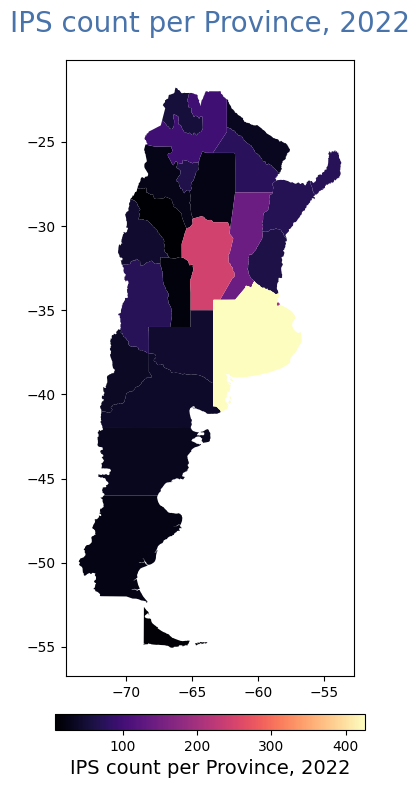

In [36]:
# In order to make the map plot, we need to make the df compatible
province_counts.index = pd.Index(province_counts.index.str.replace('TIERRA DEL FUEGO, ANTARTIDA E ISLAS DEL ATLANTICO SUR', 'TIERRA DEL FUEGO'))
#province_counts = province_counts.groupby(province_counts.index.map(lambda x: 'BUENOS AIRES' if 'BUENOS AIRES'in x else x)).sum()
provinces.name = provinces.name.str.upper()
provinces.name = provinces.name.apply(unidecode)

# Create Map df with data to plot
df_map = pd.merge(province_counts, provinces,
                  left_on='PROVINCIA',
                  right_on = 'name')
df_map.rename(columns={'name': 'Province'}, inplace=True)
# Convert the DataFrame to a GeoDataFrame, using the 'geometry' column as the spatial information
df_map = gpd.GeoDataFrame(df_map, geometry='geometry')

# Extract the minimum and maximum values of the 'Accesses per 100 houses Diff' column
vmin = df_map['RAZON_SOCIAL'].min()
vmax = df_map['RAZON_SOCIAL'].max()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define axis
ax.set_title('IPS count per Province, 2022',
             pad=20, fontdict={'fontsize':20, 'color':'#4873ab'})
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')

# Plot the GeoDataFrame with the scaled colormap
df_map.plot(column='RAZON_SOCIAL', cmap='magma', ax=ax, zorder=5, vmin=vmin, vmax=vmax)


# Add a color bar next to the plot
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.05, orientation='horizontal')
cbar.set_label('IPS count per Province, 2022', fontdict={'fontsize':14})


# Show the plot
plt.show()


In [80]:
# Generating a df with density related data

df_pob = pd.read_csv(folder_path + filepath + 'provincias_poblacion.csv')
df_pob.Provincia = df_pob.Provincia.str.upper()
df_pob.Provincia = df_pob.Provincia.apply(unidecode)
df_pob.Provincia = df_pob.Provincia.replace('TIERRA DEL FUEGO, ANTARTIDA E ISLAS DEL ATLANTICO SUR', 'TIERRA DEL FUEGO')
df_demograph = pd.merge( df_pob, province_counts,
                        left_on = 'Provincia',
                        right_on = 'PROVINCIA')
# Creating ISP density column
df_demograph.rename(columns={'RAZON_SOCIAL': 'ISP Count'}, inplace=True)
df_demograph['ISP_per_capita'] = df_demograph['ISP Count'] / df_demograph['Poblacion']

# Adding Internet Accesses Information
df_100h = pd.read_csv(folder_path + filepath + 'Internet_Penetracion.csv')

# Replace commas with periods in the 'access' column
df_100h.rename(columns={'Accesos por cada 100 hogares': 'Accesses per 100 houses'}, inplace=True)
df_100h['Accesses per 100 houses'] = df_100h['Accesses per 100 houses'].str.replace(',', '.')
# Convert the 'access' column to a float
df_100h['Accesses per 100 houses'] = df_100h['Accesses per 100 houses'].astype(float)

# Filter the DataFrame to include only the rows where year is 2022
df_100h = df_100h[df_100h['Año']==2022]
df_100h = df_100h[df_100h['Trimestre']==3]

# Prepare for merging
df_100h.Provincia = df_100h.Provincia.str.upper()
df_100h.Provincia = df_100h.Provincia.apply(unidecode)
df_100h.Provincia = df_100h.Provincia.replace('TIERRA DEL FUEGO, ANTARTIDA E ISLAS DEL ATLANTICO SUR', 'TIERRA DEL FUEGO')

df_100h = df_100h.drop(['Año','Trimestre'], axis =1 )

# Merging
df_demograph = pd.merge( df_demograph, df_100h,
                        left_on = 'Provincia',
                        right_on = 'Provincia')


# Generating a column of potential customers per Sup
df_demograph['Potential Customers per Sup'] = (100 - df_demograph['Accesses per 100 houses'])/df_demograph['Sup.[km2]']

df_demograph.head()

,Provincia,Poblacion,Sup.[km2],ISP Count,ISP_per_capita,Accesses per 100 houses,Potential Customers per Sup
0,MISIONES,1280960,29801,73,0.000057,51.82,0.001617
1,SAN LUIS,540905,76748,20,0.000037,81.74,0.000238
2,SAN JUAN,818234,89651,46,0.000056,50.80,0.000549
3,ENTRE RIOS,1426426,78781,62,0.000043,63.67,0.000461
4,SANTA CRUZ,333473,243943,24,0.000072,43.19,0.000233


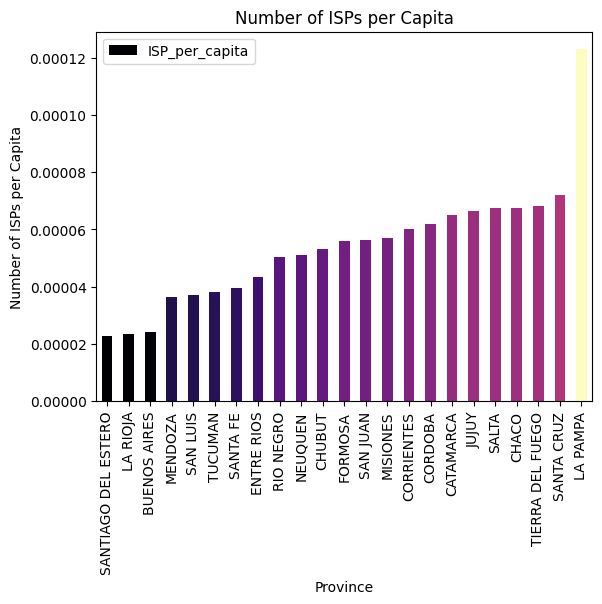

In [81]:
# Create a bar plot of the number of ISPs per capita in each province
ISP_p_capita = df_demograph[['Provincia','ISP_per_capita']]
ISP_p_capita = ISP_p_capita.set_index('Provincia')
ISP_p_capita = ISP_p_capita.sort_values('ISP_per_capita')


# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('magma')

# Create a bar plot of the average Mbps internet speed in each province

vmin=ISP_p_capita['ISP_per_capita'].min()
vmax=ISP_p_capita['ISP_per_capita'].max()
ax = ISP_p_capita.plot(kind='bar',
                       y = 'ISP_per_capita',
                      color=cmap((ISP_p_capita['ISP_per_capita'] - vmin) / (vmax - vmin)))


plt.title('Number of ISPs per Capita')
plt.xlabel('Province')
plt.ylabel('Number of ISPs per Capita')
plt.show()

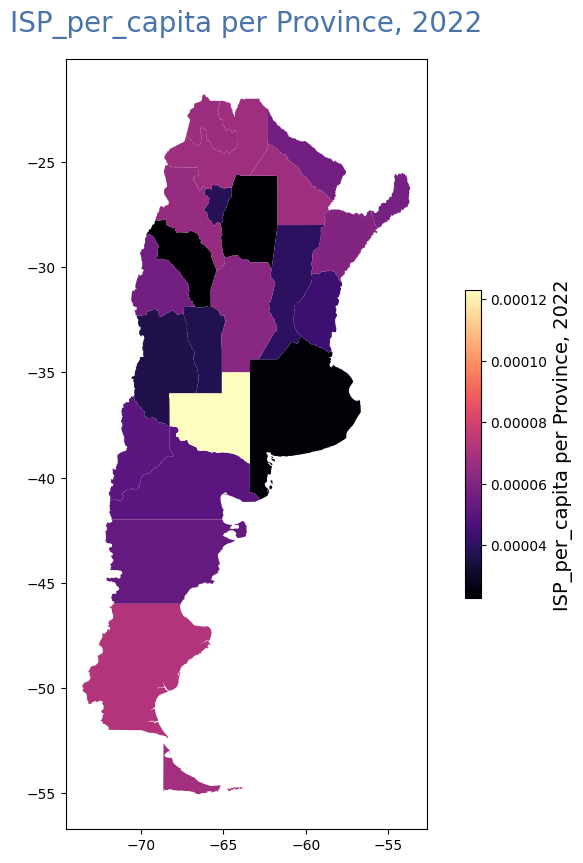

In [82]:
# Create Map df with data to plot
df_map = pd.merge(ISP_p_capita, provinces,
                  left_on='Provincia',
                  right_on = 'name')
df_map.rename(columns={'name': 'Province'}, inplace=True)
# Convert the DataFrame to a GeoDataFrame, using the 'geometry' column as the spatial information
df_map = gpd.GeoDataFrame(df_map, geometry='geometry')

# Extract the minimum and maximum values of the 'Accesses per 100 houses Diff' column
vmin = df_map['ISP_per_capita'].min()
vmax = df_map['ISP_per_capita'].max()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define axis
ax.set_title('ISP_per_capita per Province, 2022',
             pad=20, fontdict={'fontsize':20, 'color':'#4873ab'})
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')

# Plot the GeoDataFrame with the scaled colormap
df_map.plot(column='ISP_per_capita', cmap='magma', ax=ax, zorder=5, vmin=vmin, vmax=vmax)


# Add a color bar next to the plot
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.05, orientation='vertical')
cbar.set_label('ISP_per_capita per Province, 2022', fontdict={'fontsize':14})


# Show the plot
plt.show()

This analysis clearly indicates which provinces have a reduced number of market competitor compared with the number of potential customers.

The most relevant areas are:
+ Santiago del Estero
+ La Rioja
+ Buenos Aires

Followed by:
+ Mendoza
+ San Luis
+ Tucuman
+ Santa Fe
+ Entre Rios

### Return on Investment

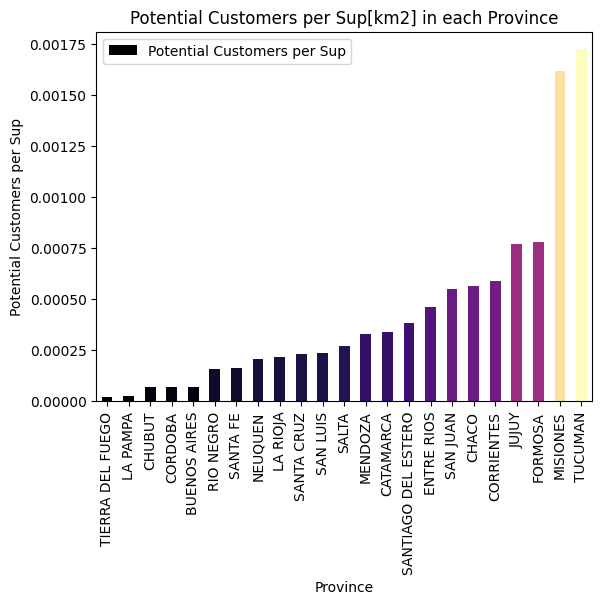

In [83]:
# Similarly We could study the number of potential customers vs surface ratio
pot_customer_sup = df_demograph[['Provincia','Potential Customers per Sup']]
pot_customer_sup = pot_customer_sup.set_index('Provincia')
pot_customer_sup = pot_customer_sup.sort_values('Potential Customers per Sup')

# Define the colormap for the diverging bar chart
cmap = plt.get_cmap('magma')

# Create a bar plot of the average Mbps internet speed in each province

vmin=pot_customer_sup['Potential Customers per Sup'].min()
vmax=pot_customer_sup['Potential Customers per Sup'].max()
ax = pot_customer_sup.plot(kind='bar',
                       y = 'Potential Customers per Sup',
                      color=cmap((pot_customer_sup['Potential Customers per Sup'] - vmin) / (vmax - vmin)))



plt.title('Potential Customers per Sup[km2] in each Province')
plt.xlabel('Province')
plt.ylabel('Potential Customers per Sup')
plt.show()

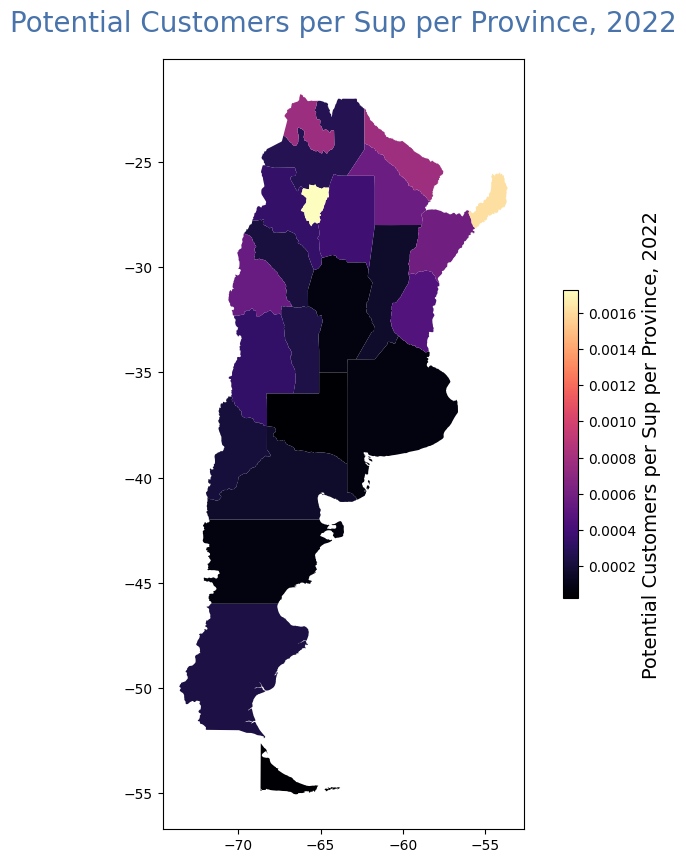

In [84]:
# Create Map df with data to plot
df_map = pd.merge(pot_customer_sup, provinces,
                  left_on='Provincia',
                  right_on = 'name')
df_map.rename(columns={'name': 'Province'}, inplace=True)
# Convert the DataFrame to a GeoDataFrame, using the 'geometry' column as the spatial information
df_map = gpd.GeoDataFrame(df_map, geometry='geometry')

# Extract the minimum and maximum values of the 'Accesses per 100 houses Diff' column
vmin = df_map['Potential Customers per Sup'].min()
vmax = df_map['Potential Customers per Sup'].max()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define axis
ax.set_title('Potential Customers per Sup per Province, 2022',
             pad=20, fontdict={'fontsize':20, 'color':'#4873ab'})
#ax.set_xlabel('Long')
#ax.set_ylabel('Lat')

# Plot the GeoDataFrame with the scaled colormap
df_map.plot(column='Potential Customers per Sup', cmap='magma', ax=ax, zorder=5, vmin=vmin, vmax=vmax)


# Add a color bar next to the plot
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.05, orientation='vertical')
cbar.set_label('Potential Customers per Sup per Province, 2022', fontdict={'fontsize':14})


# Show the plot
plt.show()

In this case, we must pay attention to the provinces that have a high number of potential customers concentrated in a reduce area to cover.

In this case, the provinces with the higher density of potential new customers are:

+ Misiones
+ Tucuman

And in second order:
+ Formosa
+ Jujuy

## Conclusions

From the analysis of the obtained KPIs, areas of potential growth can be identified and compared.

Several aspects have been considered:
+ Sucess of previous customers capturing campaigns. This can be undestand in two ways. The first one is that the companies that are already established in the area are popular. The second one indicates that the population is interested in contracting an internet service.

+ Quality of services. Whether the internet speed is approtiated to the national context and considering if the deployed network is based on outdated technology or not.
Quality of service is the main churn reason for customers, therefore is a crucial aspect.

+ Market share, named how many companies compete for the same set of customers.

+ Potential customers density. It must be considered that infrastructure deployment is expensive. Therefore, it is important to target areas with high density of potential customers. Otherwise, the initial investment in infrastructure may not be profitable.


From the above, some provinces  proved to be tempting because they lead in several of the indicators:

+ Santiago del Estero presents a really outdated technology and bad quality of services. It also has a reduce number of competitors

+ San Luis presents a population demanding internet services in the last years. The deployed network is outdated and the quality of services is poor. It does not present a strong set of market competitors either.

+ Formosa present an average case with considerably high density of potential customers and a poor quality of services nowadays.